<a href="https://colab.research.google.com/github/ManisMalakar/Transfer-Learning/blob/main/Google_Stock_Price_Prediction_with_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#Data PreProcessing

#Importing the dataset
from google.colab import files
uploaded=files.upload()

In [49]:
training_data=pd.read_csv('/content/training_set.csv')

In [50]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2744,2021-01-14,1753.619995,1775.010010,1733.400024,1740.180054,1740.180054,1179500
2745,2021-01-15,1738.189941,1756.000000,1721.550049,1736.189941,1736.189941,1342200
2746,2021-01-19,1752.250000,1809.275024,1741.459961,1790.859985,1790.859985,1734600
2747,2021-01-20,1831.459961,1903.709961,1825.530029,1886.900024,1886.900024,2490300
2748,2021-01-21,1898.000000,1934.859985,1887.109985,1891.250000,1891.250000,2063900


In [51]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2749 non-null   object 
 1   Open       2749 non-null   float64
 2   High       2749 non-null   float64
 3   Low        2749 non-null   float64
 4   Close      2749 non-null   float64
 5   Adj Close  2749 non-null   float64
 6   Volume     2749 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.5+ KB


In [52]:
training_set=training_data.iloc[:,1:2].values

In [53]:
training_set.shape,training_data.shape

((2749, 1), (2749, 7))

In [54]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(training_set)

In [55]:
#Creating a data structure with 60 timesteps and 1 output
x_train=[]
y_train=[]

for i in range(60,2749):
  x_train.append(train_set_scaled[i-60:i,0])
  y_train.append(train_set_scaled[i,0])

#Converting X train and Y Train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [56]:
x_train

array([[0.03233766, 0.0310476 , 0.02837256, ..., 0.02318859, 0.02119268,
        0.02030595],
       [0.0310476 , 0.02837256, 0.02633812, ..., 0.02119268, 0.02030595,
        0.02126089],
       [0.02837256, 0.02633812, 0.0264271 , ..., 0.02030595, 0.02126089,
        0.01718606],
       ...,
       [0.80670529, 0.81844579, 0.83810443, ..., 0.9050881 , 0.9140423 ,
        0.9048559 ],
       [0.81844579, 0.83810443, 0.83747339, ..., 0.9140423 , 0.9048559 ,
        0.91322666],
       [0.83810443, 0.83747339, 0.82000563, ..., 0.9048559 , 0.91322666,
        0.9603849 ]])

In [57]:
y_train

array([0.02126089, 0.01718606, 0.01386748, ..., 0.91322666, 0.9603849 ,
       1.        ])

In [58]:
x_train.shape

(2689, 60)

In [59]:
#Reshaping the dataset
x_train=x_train.reshape(2689,60,1)

In [60]:
x_train.shape

(2689, 60, 1)

In [61]:
#Building the LSTM layer

#Initializing the RNN
model=tf.keras.models.Sequential()

In [62]:
#Adding the first LSTM Layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))

In [63]:
#Adding a Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [64]:
#Adding the second LSTM Layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))

#Adding a Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [65]:
#Adding the third LSTM Layer
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))

#Adding a Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [66]:
#Adding the fourth LSTM Layer
model.add(tf.keras.layers.LSTM(units=100,activation='relu',return_sequences=True))

#Adding a Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [67]:
#Adding the fifth LSTM Layer
model.add(tf.keras.layers.LSTM(units=120,activation='relu'))

#Adding a Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [68]:
#Output layer
model.add(tf.keras.layers.Dense(units=1))

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 60)            14880     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 100)          

In [70]:
#Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [71]:
#Training the model
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
85/85 [==============================] - 23s 215ms/step - loss: 0.0491
Epoch 2/100
85/85 [==============================] - 19s 227ms/step - loss: 0.0031
Epoch 3/100
85/85 [==============================] - 19s 227ms/step - loss: 0.0028
Epoch 4/100
85/85 [==============================] - 19s 226ms/step - loss: 0.0027
Epoch 5/100
85/85 [==============================] - 19s 228ms/step - loss: 0.0022
Epoch 6/100
85/85 [==============================] - 19s 227ms/step - loss: 0.0018
Epoch 7/100
85/85 [==============================] - 19s 227ms/step - loss: 0.0030
Epoch 8/100
85/85 [==============================] - 19s 227ms/step - loss: 0.0022
Epoch 9/100
85/85 [==============================] - 19s 228ms/step - loss: 0.0019
Epoch 10/100
85/85 [==============================] - 19s 228ms/step - loss: 0.0032
Epoch 11/100
85/85 [==============================] - 19s 227ms/step - loss: 0.0019
Epoch 12/100
85/85 [==============================] - 19s 228ms/step - loss: 0.0020
E

In [74]:
#Making Predictions

#Getting the real stock prices of the month Feb 2021
test_data=pd.read_csv('/content/testing_set.csv')

test_data.shape

(20, 7)

In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [78]:
real_stock_price=test_data.iloc[:,1:2].values

In [79]:
real_stock_price.shape

(20, 1)

In [81]:
# Getting predicted stock prices of month Feb 2021

#Concatinization
dataset_total=pd.concat((training_data['Open'],test_data['Open']),axis=0)

#Stock Prices from the previous 60 days for each day of Feb 2021
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values

#Reshaping the dataset 
inputs=inputs.reshape(-1,1)

#Feature Scaling
inputs=sc.transform(inputs)

#Creating a test shape
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

#Converting into numpy array
x_test=np.array(x_test)

#Converting into three dimension
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#Gettiing the predicted stock prices
pred_stock_price=model.predict(x_test)
pred_stock_price=sc.inverse_transform(pred_stock_price)

In [83]:
print(pred_stock_price[5],print(real_stock_price[5]))

[1846.170044]
[1797.5259] None


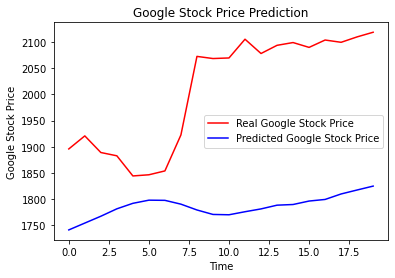

In [85]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(pred_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()